# GMM Task Visualization

This notebook visualizes the 2D Gaussian Mixture Model (GMM) tasks generated by `make_gmm_task` function from `lop_fixed_regime.py`.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

# Import the make_gmm_task function
import sys
sys.path.append('..')
from lop_fixed_regime import make_gmm_task

## 1. Visualize Multiple Random Tasks

Generate and visualize several random GMM tasks with default parameters to see the diversity of tasks.

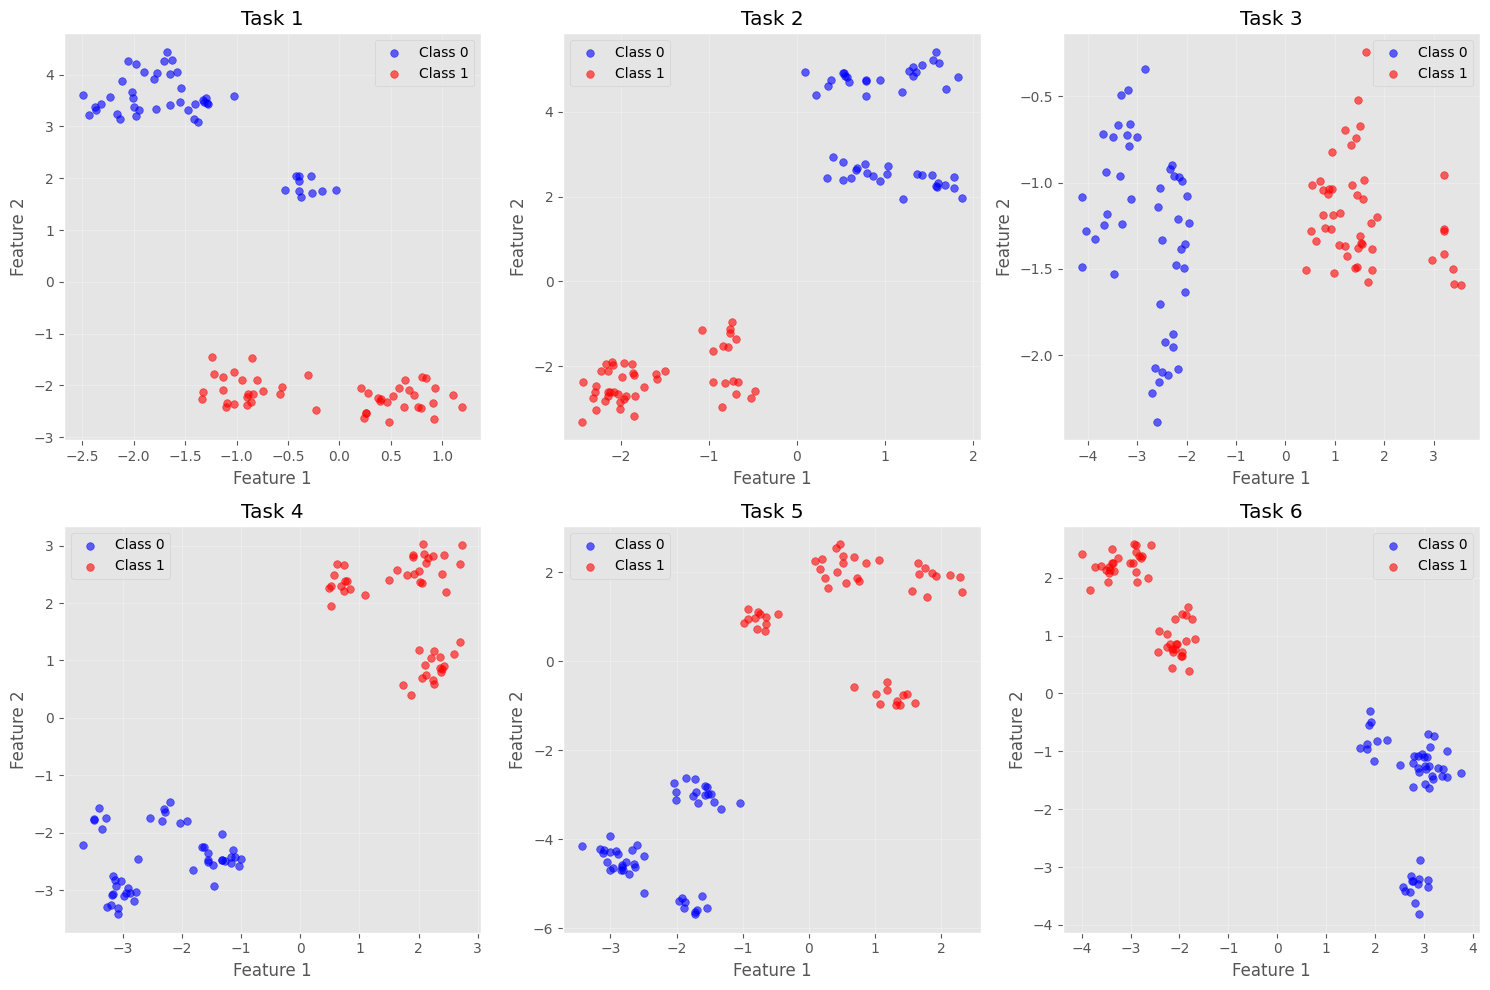

In [ ]:
# Generate and plot 6 random tasks
rng = np.random.default_rng(42)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Generate task with default parameters
    X, y = make_gmm_task(rng, n=96, d=2, k=4, delta=3.0, spread=0.8, sigma=0.22)
    
    # Separate classes
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    # Plot
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'Task {i+1}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Effect of Delta (Class Separation)

Visualize how the `delta` parameter controls the separation between classes.

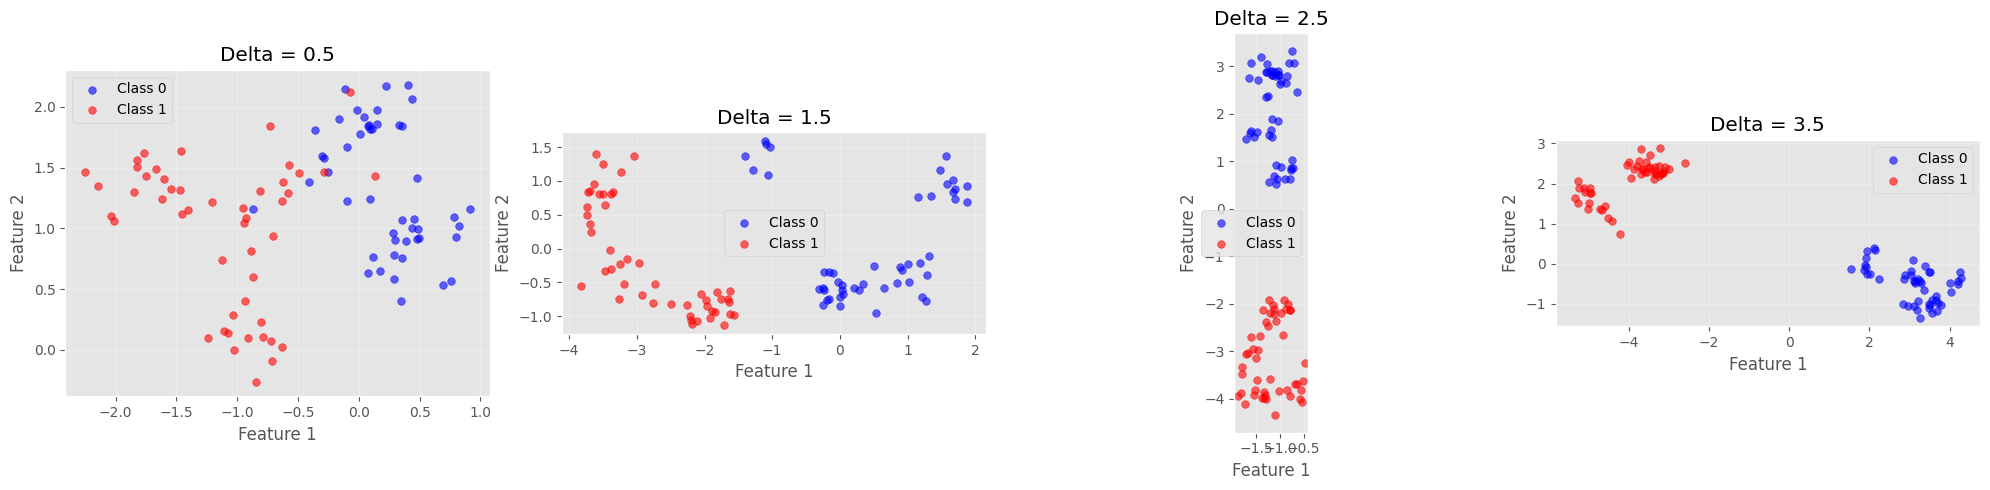

In [ ]:
rng = np.random.default_rng(123)
delta_values = [0.5, 1.5, 2.5, 3.5]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (delta, ax) in enumerate(zip(delta_values, axes)):
    X, y = make_gmm_task(rng, n=96, d=2, k=4, delta=delta, spread=0.8, sigma=0.22)
    
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'Delta = {delta}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 3. Effect of K (Number of Gaussian Bumps)

Visualize how the `k` parameter controls the number of sub-clusters per class.

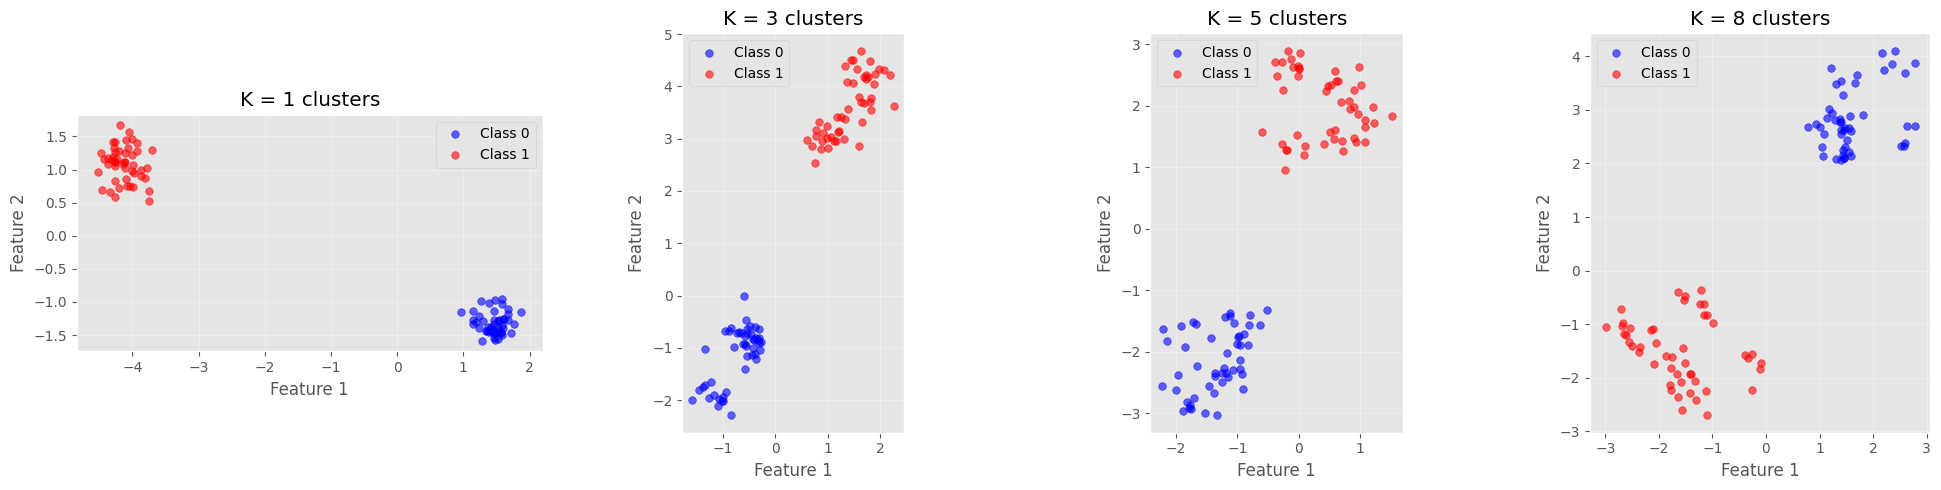

In [ ]:
rng = np.random.default_rng(456)
k_values = [1, 3, 5, 8]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (k, ax) in enumerate(zip(k_values, axes)):
    X, y = make_gmm_task(rng, n=96, d=2, k=k, delta=2.8, spread=0.7, sigma=0.22)
    
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'K = {k} clusters')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 4. Effect of Spread (Cluster Dispersion)

Visualize how the `spread` parameter controls how dispersed the sub-clusters are around class centers.

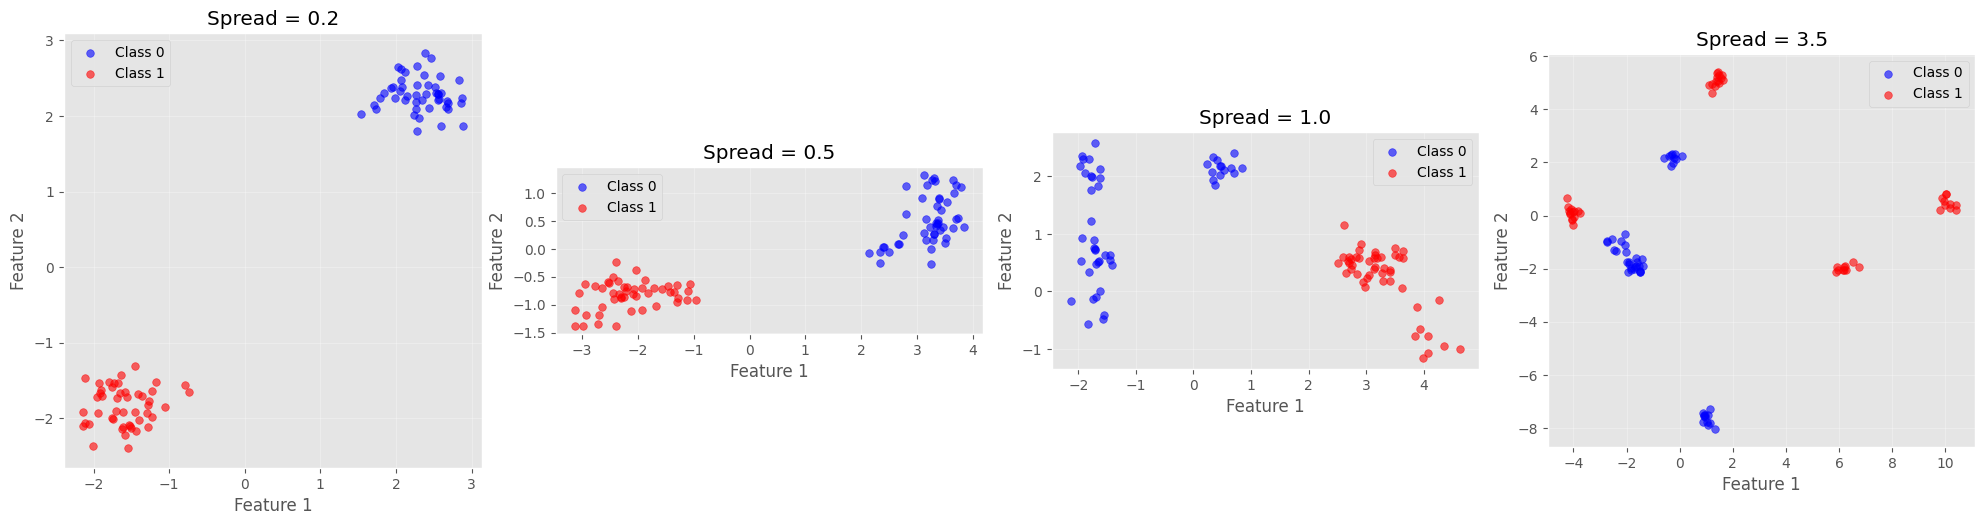

In [18]:
rng = np.random.default_rng(np.random.randint(0, 10000))
spread_values = [0.2, 0.5, 1.0, 3.5]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (spread, ax) in enumerate(zip(spread_values, axes)):
    X, y = make_gmm_task(rng, n=96, d=2, k=4, delta=2.8, spread=spread, sigma=0.22)
    
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'Spread = {spread}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 5. Effect of Sigma (Sample Noise)

Visualize how the `sigma` parameter controls the noise around each cluster center.

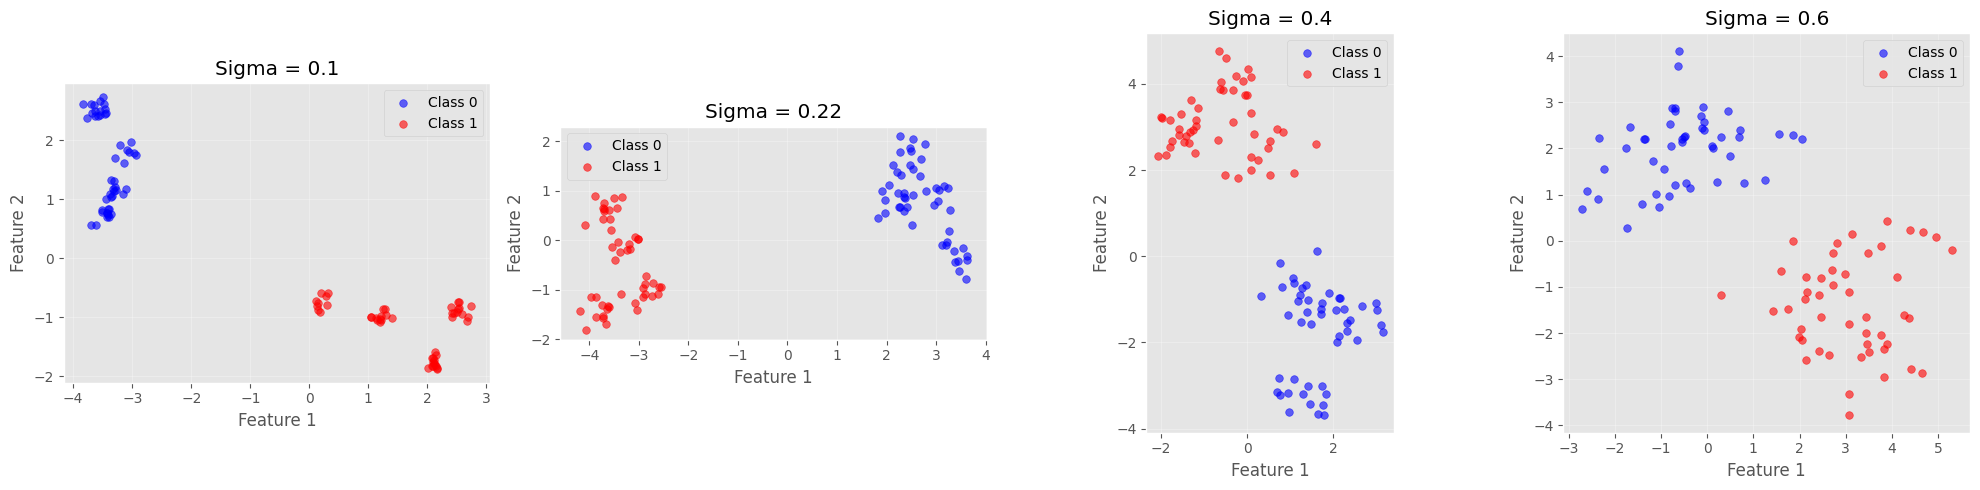

In [ ]:
rng = np.random.default_rng(101)
sigma_values = [0.1, 0.22, 0.4, 0.6]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (sigma, ax) in enumerate(zip(sigma_values, axes)):
    X, y = make_gmm_task(rng, n=96, d=2, k=4, delta=2.8, spread=0.7, sigma=sigma)
    
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'Sigma = {sigma}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 6. Effect of Label Noise (relabel_p)

Visualize how the `relabel_p` parameter introduces label noise by randomly flipping labels.

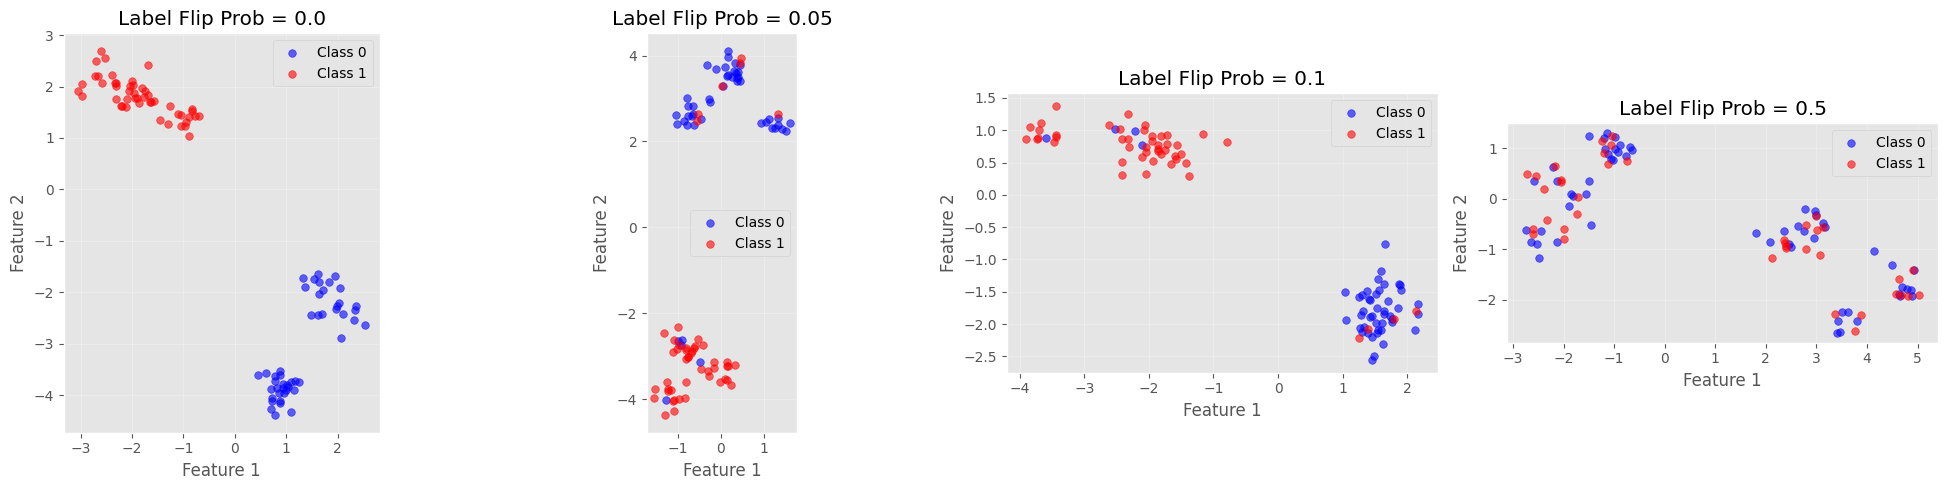

In [20]:
rng = np.random.default_rng(202)
relabel_values = [0.0, 0.05, 0.1, 0.5]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (relabel_p, ax) in enumerate(zip(relabel_values, axes)):
    X, y = make_gmm_task(rng, n=96, d=2, k=4, delta=2.8, spread=0.7, sigma=0.22, relabel_p=relabel_p)
    
    class_0 = X[y.flatten() == 0]
    class_1 = X[y.flatten() == 1]
    
    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
    ax.set_title(f'Label Flip Prob = {relabel_p}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 7. Extreme Cases: Easy vs Hard Tasks

Compare tasks that are trivially easy to separate vs. very challenging tasks.

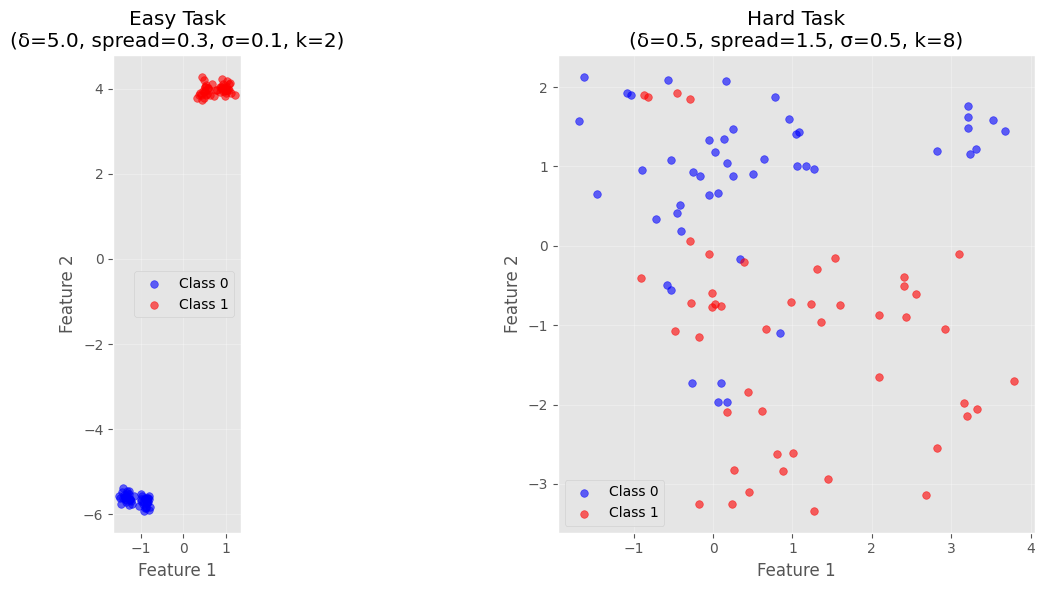

In [ ]:
rng = np.random.default_rng(303)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Easy task: Large delta, small spread, small sigma
X_easy, y_easy = make_gmm_task(rng, n=96, d=2, k=2, delta=5.0, spread=0.3, sigma=0.1)
class_0_easy = X_easy[y_easy.flatten() == 0]
class_1_easy = X_easy[y_easy.flatten() == 1]

axes[0].scatter(class_0_easy[:, 0], class_0_easy[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
axes[0].scatter(class_1_easy[:, 0], class_1_easy[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
axes[0].set_title('Easy Task\n(δ=5.0, spread=0.3, σ=0.1, k=2)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# Hard task: Small delta, large spread, large sigma, many clusters
X_hard, y_hard = make_gmm_task(rng, n=96, d=2, k=8, delta=0.5, spread=1.5, sigma=0.5)
class_0_hard = X_hard[y_hard.flatten() == 0]
class_1_hard = X_hard[y_hard.flatten() == 1]

axes[1].scatter(class_0_hard[:, 0], class_0_hard[:, 1], c='blue', alpha=0.6, s=30, label='Class 0')
axes[1].scatter(class_1_hard[:, 0], class_1_hard[:, 1], c='red', alpha=0.6, s=30, label='Class 1')
axes[1].set_title('Hard Task\n(δ=0.5, spread=1.5, σ=0.5, k=8)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()